<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
#memanggil file dataset
path = "/content/gdrive/MyDrive/SEMESTER 3/ML/tugas/tugas05"

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [96]:
#membaca file csv menggunakan pandas (pd)
df = pd.read_csv(path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [98]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [99]:
df.duplicated().sum()

np.int64(0)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [101]:
# rename kolom agar lebih mudah
df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, inplace=True)

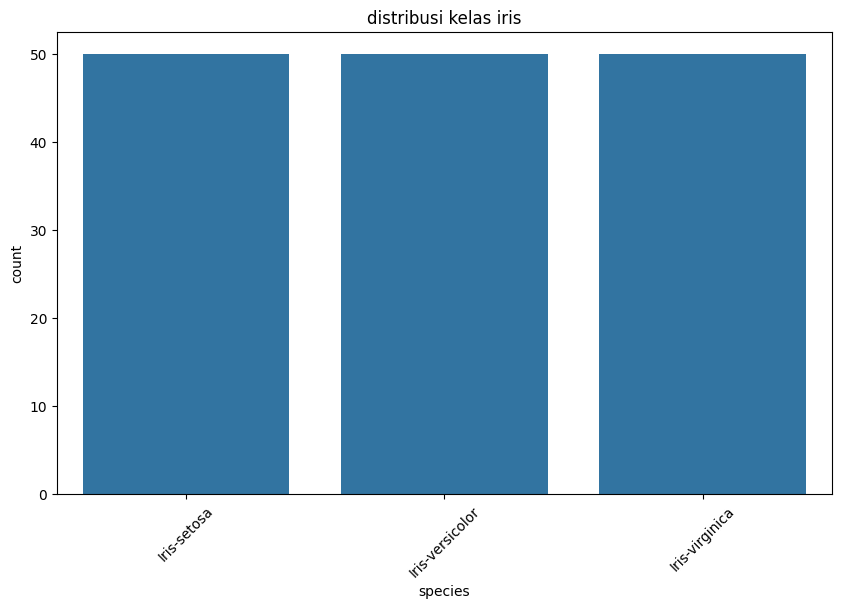

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('distribusi kelas iris')
plt.xticks(rotation=45)
plt.show()

In [103]:
#ubah target 'species' (teks) menjadi 'species_code' (angka)
species_cat = df['species'].astype('category')

#simpan nama kelasnya utk laporan evaluasi
species_classes = list(species_cat.cat.categories)
df['species_code'] = species_cat.cat.codes #kolom baru

df['species'] = species_cat

df.head(150)

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


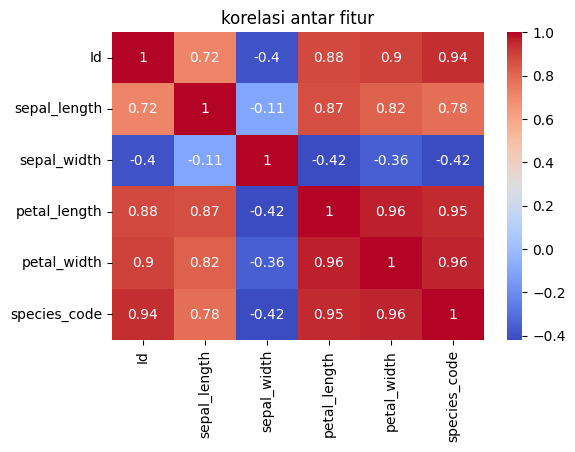

In [105]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('korelasi antar fitur')
plt.show()

In [106]:
# fitur (X) dan target (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
y = df['species'] # target: kolom yang sudah di-encode

In [107]:
# bagi dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% utk testing
    random_state=42,  # agar hasil konsisten
    stratify=y        # menjaga proporsi kelas
)

print(f"jumlah data training: {len(X_train)}")
print(f"jumlah data testing:  {len(X_test)}")

jumlah data training: 120
jumlah data testing:  30


In [108]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
 )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [109]:
#menggunakan dataset testing untuk menguji model
y_pred = dt.predict(X_test)

In [110]:
acc = accuracy_score(y_test, y_pred)
print(f"akurasi: {round(acc * 100, 2)}%")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

akurasi: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [111]:
#classification report
print("classification report:")
report = classification_report(y_test, y_pred, target_names=species_classes)
print(report)

classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



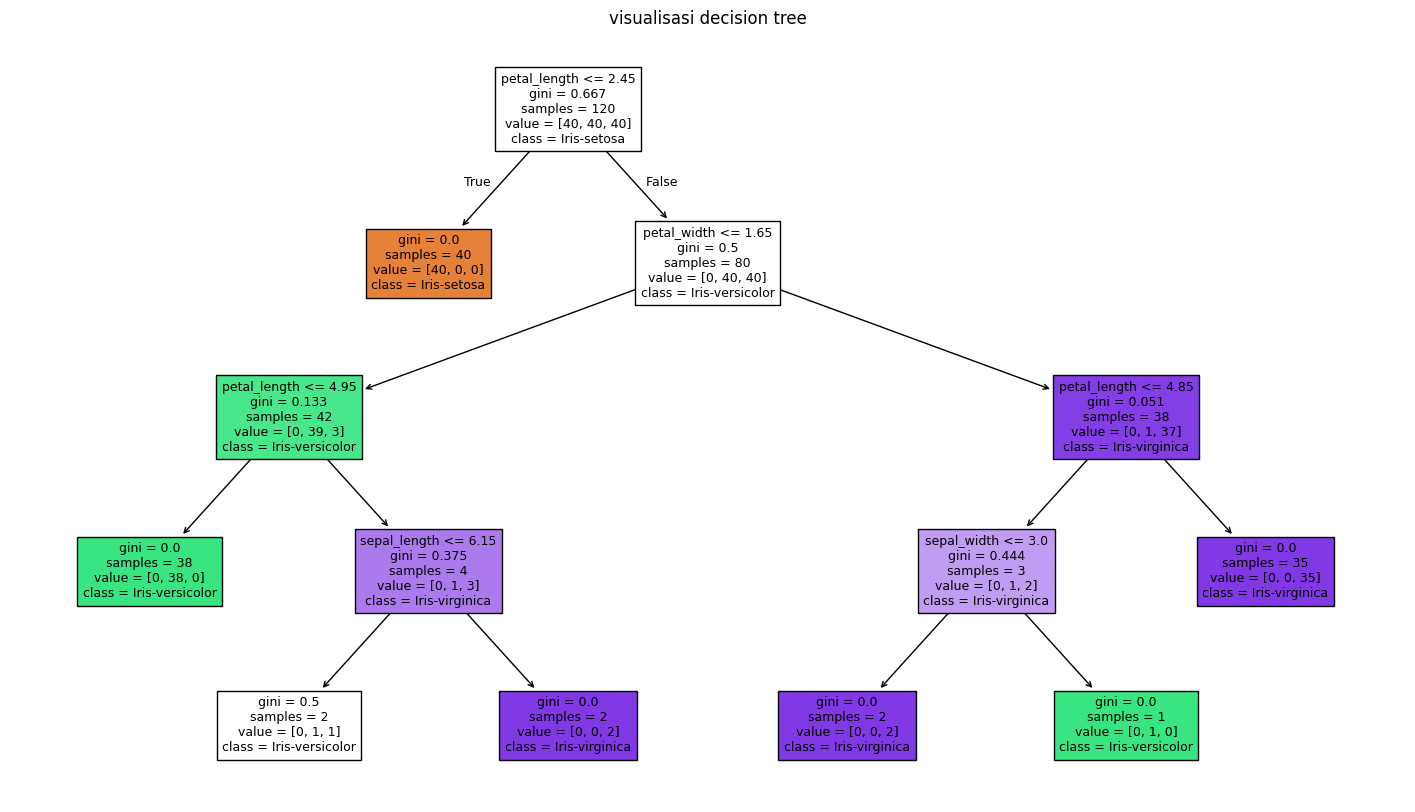

In [112]:
# visualisasi decision tree
plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=species_classes,
    filled=True,
    fontsize=9
)
plt.title("visualisasi decision tree")
plt.show()

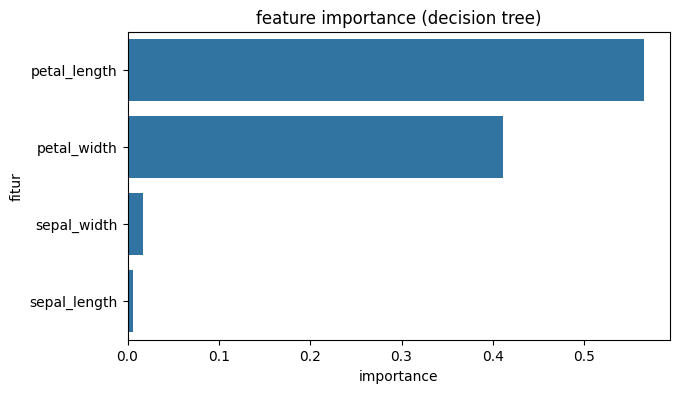

,0
petal_length,0.565639
petal_width,0.411154
sepal_width,0.016878
sepal_length,0.006329


In [113]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("feature importance (decision tree)")
plt.xlabel("importance")
plt.ylabel("fitur")
plt.show()

imp

In [114]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("best max_depth:", best_d, "\nacc:", round(scores[best_d]*100,2), "%")

best max_depth: 3 
acc: 96.67 %
